In [24]:
from matplotlib import pyplot as plt
import math as m
# from skimage.color import rgb2gray
# from skimage.io import imread
import cv2
import numpy as np
from scipy import fftpack
from scipy.spatial.transform import Rotation as R
# import numpy as np
from collections import Counter
import cmath

In [53]:
# IMG = np.array([[0,10,20,10,0],[20,30,40,30,20],[50,50,50,50,50],[80,70,60,70,80],[100,90,80,90,100]])

IMG = cv2.imread("330px-SheppLogan_Phantom3.svg.png",0)


IMG=cv2.resize(IMG,(50,50))

IMG_vector = np.zeros((IMG.shape[0],IMG.shape[1],3),dtype=np.float_)
IMG_K_Space = np.zeros((IMG.shape[0],IMG.shape[1]),dtype=np.complex_)

def getMatrixSum(matrix):
    mx = 0
    my = 0
    for i in range(0,matrix.shape[0]):
        for j in range(0,matrix.shape[1]):
            mx += matrix[i][j][0] 
            my += matrix[i][j][1] 
    return complex(mx,my)

def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

X_Rotation = Rx(np.radians(90))*Ry(0)*Rz(0)


In [39]:
for i_outer in range(IMG.shape[0]):
    Gy_Phase = ((2*np.pi)/IMG.shape[0]) + ((2*np.pi)/IMG.shape[0])*i_outer
    IMG_vector[:,:,:] = 0
    #construct our vectors
    for i in range(0,IMG.shape[0]):
        for j in range(0,IMG.shape[1]):
            IMG_vector[i][j][2] = IMG[i][j]

    #simulate RF
    for i in range(0,IMG.shape[0]):
        for j in range(0,IMG.shape[1]):
            IMG_vector[i][j] = IMG_vector[i][j]*X_Rotation

    #simulate Gy
    for i in range(0,IMG.shape[0]):
        Z_Rotation = Rx(0)*Ry(0)*Rz((Gy_Phase/IMG.shape[0])+((Gy_Phase/IMG.shape[0])*i))
        for j in range(0,IMG.shape[1]):
            IMG_vector[i][j] = IMG_vector[i][j]*Z_Rotation 

    #simulate Gx
    for GxRepeat in range(0,IMG.shape[1]):
        for i in range(0,IMG.shape[1]):
            Z_Rotation = Rx(0)*Ry(0)*Rz(((2*np.pi)/IMG.shape[0])+(((2*np.pi)/IMG.shape[0])*i))
            for j in range(0,IMG.shape[0]):
                IMG_vector[j][i] = IMG_vector[j][i]*Z_Rotation 
        IMG_K_Space[i_outer][(IMG.shape[1]-1)-GxRepeat] = getMatrixSum(IMG_vector)



normal fourier 
 [[ 1.25000000e+03  +0.j         -1.42108547e-14  +0.j
  -7.10542736e-15  +0.j         -7.10542736e-15  +0.j
  -1.42108547e-14  +0.j        ]
 [-2.68090170e+02+368.99446297j -7.66311896e+01 +24.89898285j
   1.11803399e+01  +3.63271264j -6.90983006e+00  -9.51056516j
   0.00000000e+00 +80.57480107j]
 [-2.56909830e+02 +83.47506394j -1.80901699e+01  -5.87785252j
   1.63118961e+00  +2.24513988j  6.43929354e-15  -2.77514551j
  -1.11803399e+01 +15.38841769j]
 [-2.56909830e+02 -83.47506394j -1.11803399e+01 -15.38841769j
   6.43929354e-15  +2.77514551j  1.63118961e+00  -2.24513988j
  -1.80901699e+01  +5.87785252j]
 [-2.68090170e+02-368.99446297j  0.00000000e+00 -80.57480107j
  -6.90983006e+00  +9.51056516j  1.11803399e+01  -3.63271264j
  -7.66311896e+01 -24.89898285j]]
K Space 
 [[ 989.97393702+6.78713882e+02j   37.94493616-4.79356020e+00j
    -4.88987213-2.68822995e+00j    2.37588773+5.04901844e+00j
     7.16668346-3.75690704e+01j]
 [ 983.10169358-3.99662714e+02j   44.25923768-

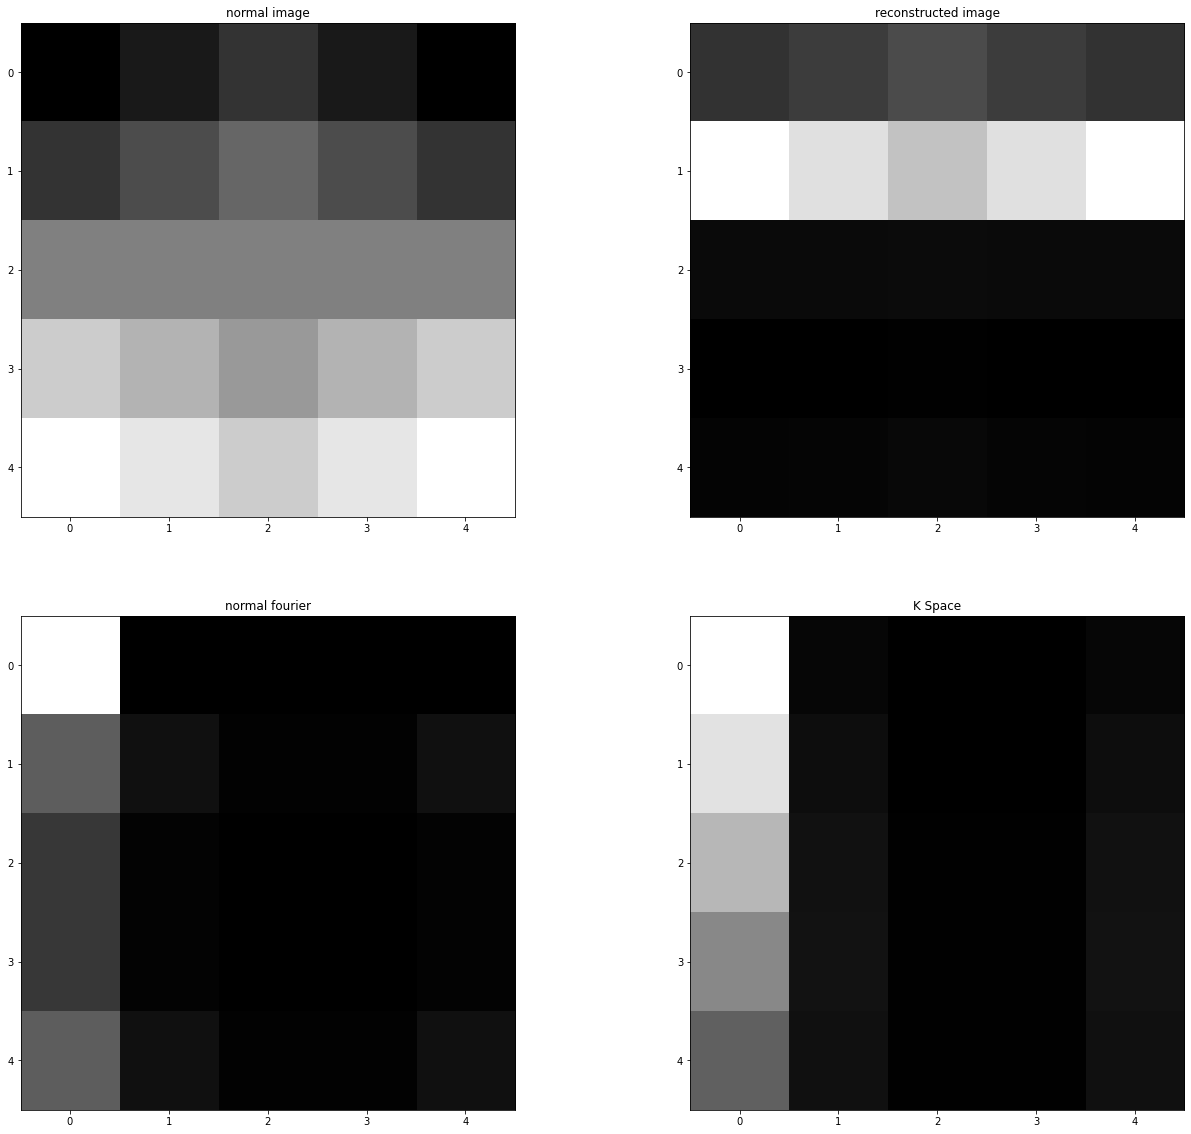

In [40]:
fig,ax = plt.subplots(2,2,figsize=(22, 20))

dft_shift = np.fft.fft2(IMG)

NORM_IMG_Back = np.fft.ifft2(dft_shift)

IMG_back = np.fft.ifft2(IMG_K_Space)

ax[0][0].imshow(abs(NORM_IMG_Back),cmap='gray')
ax[0][0].set_title('normal image')

ax[0][1].imshow(abs(IMG_back),cmap='gray')
ax[0][1].set_title('reconstructed image')
 
ax[1][0].imshow(abs(dft_shift),cmap='gray')
ax[1][0].set_title('normal fourier')
print("normal fourier \n",dft_shift)


ax[1][1].imshow(abs(IMG_K_Space),cmap='gray')
ax[1][1].set_title('K Space')

print("K Space \n",IMG_K_Space)

In [54]:
for Krow in range(IMG.shape[0]):
    print(Krow)
    Gy_Phase = ((2*np.pi)/IMG.shape[0])*(Krow)
    IMG_vector[:,:,:] = 0
    #construct our vectors
    for i in range(0,IMG.shape[0]):
        for j in range(0,IMG.shape[1]):
            IMG_vector[i][j][2] = IMG[i][j]

    #simulate RF
    for i in range(0,IMG.shape[0]):
        for j in range(0,IMG.shape[1]):
            IMG_vector[i][j] = IMG_vector[i][j]*X_Rotation

    #simulate Gy
    for i in range(0,IMG.shape[0]):
        Z_Rotation = Rx(0)*Ry(0)*Rz((Gy_Phase/IMG.shape[0])+((Gy_Phase/IMG.shape[0])*i))
        for j in range(0,IMG.shape[1]):
            IMG_vector[i][j] = IMG_vector[i][j]*Z_Rotation 

    #simulate Gx
    for Kcol in range(0,IMG.shape[1]):
        # stepi = 2*np.pi/(IMG.shape[0])*(Krow)
        Gx_phase = 2*np.pi/(IMG.shape[0])*(Kcol)
        for i in range(0,IMG.shape[1]):
            Z_Rotation = Rx(0)*Ry(0)*Rz((((2*np.pi)/IMG.shape[0])*i))
            for j in range(0,IMG.shape[0]):
                # theta=Gy_Phase*i + stepj*j
                IMG_vector[j][i] = IMG_vector[j][i]*Z_Rotation 
                IMG_K_Space[Krow][Kcol] += (np.sqrt(np.square(IMG_vector[i][j][0])+np.square(IMG_vector[i][j][1]))*np.exp(complex(0,-(Gy_Phase*i + Gx_phase*j))))



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Text(0.5, 1.0, 'K Space')

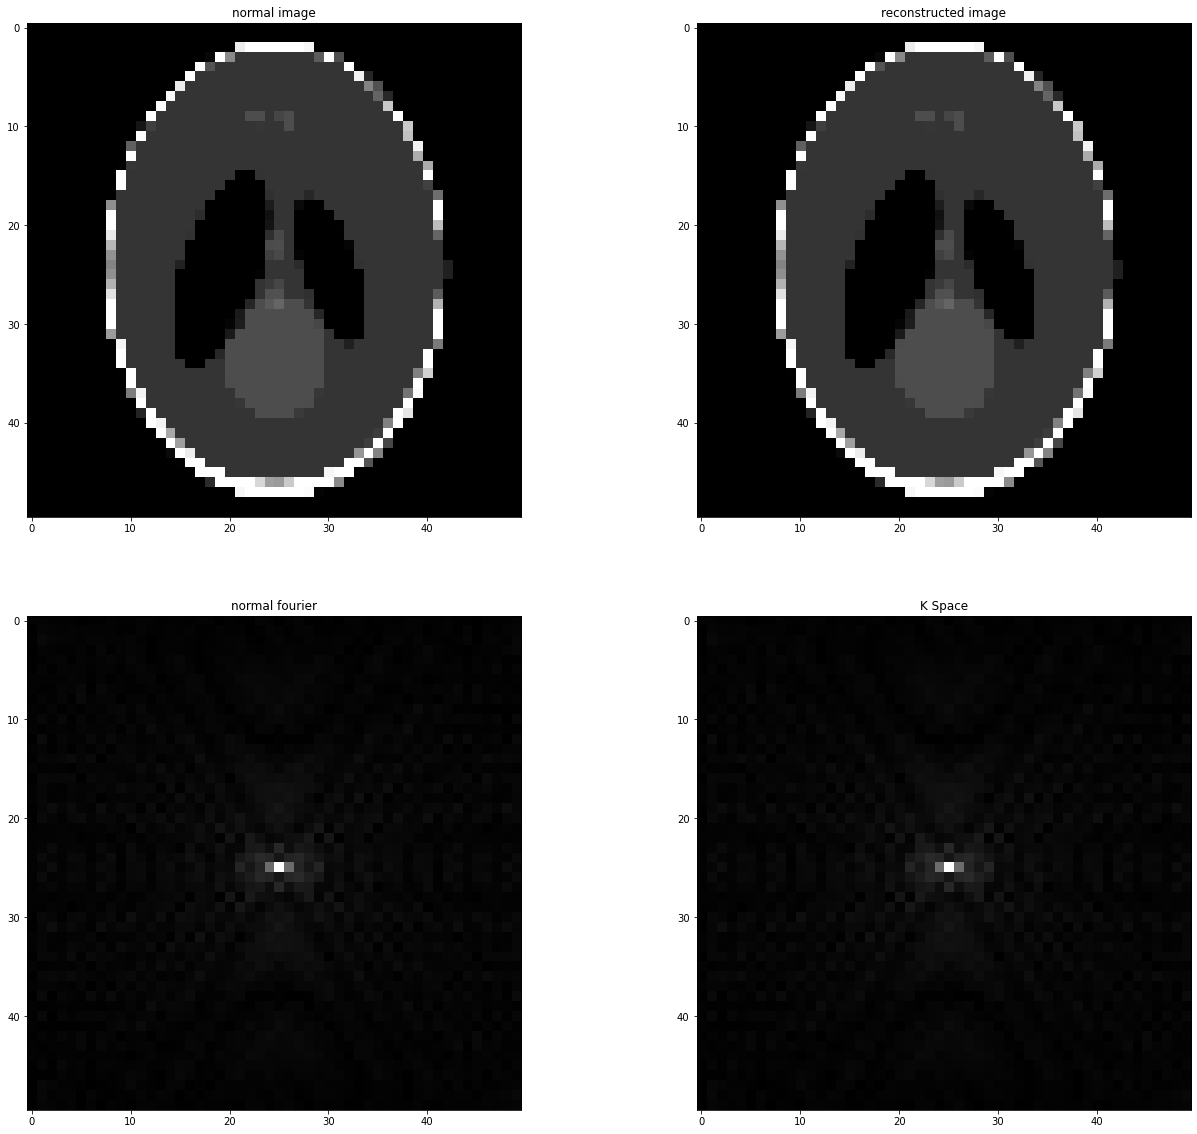

In [56]:
fig,ax = plt.subplots(2,2,figsize=(22, 20))

dft_shift = np.fft.fftshift(np.fft.fft2(IMG))

IMG_K_Space_shift = np.fft.fftshift(IMG_K_Space)

NORM_IMG_Back = np.fft.ifft2(np.fft.ifftshift(dft_shift))

IMG_back = np.fft.ifft2(np.fft.ifftshift(IMG_K_Space_shift))

ax[0][0].imshow(abs(NORM_IMG_Back),cmap='gray')
ax[0][0].set_title('normal image')

ax[0][1].imshow(abs(IMG_back),cmap='gray')
ax[0][1].set_title('reconstructed image')
 
ax[1][0].imshow(abs(dft_shift),cmap='gray')
ax[1][0].set_title('normal fourier')
# print("normal fourier \n",dft_shift)


ax[1][1].imshow(abs(IMG_K_Space_shift),cmap='gray')
ax[1][1].set_title('K Space')

# print("K Space \n",IMG_K_Space)